In [1]:
# import num sci panda
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt


The dataset for this exercise is from Kaggle:

https://www.kaggle.com/datasets/yashgpt/us-college-data

* Private - A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate


In [5]:
#read the csv file into a dataframe
college = pd.read_csv('../data/College.csv', index_col=0)

#look at it
print(college)


                               Private   Apps  Accept  Enroll  Top10perc  \
Abilene Christian University       Yes   1660    1232     721         23   
Adelphi University                 Yes   2186    1924     512         16   
Adrian College                     Yes   1428    1097     336         22   
Agnes Scott College                Yes    417     349     137         60   
Alaska Pacific University          Yes    193     146      55         16   
...                                ...    ...     ...     ...        ...   
Worcester State College             No   2197    1515     543          4   
Xavier University                  Yes   1959    1805     695         24   
Xavier University of Louisiana     Yes   2097    1915     695         34   
Yale University                    Yes  10705    2453    1317         95   
York College of Pennsylvania       Yes   2989    1855     691         28   

                                Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilen

In [6]:
# use describe to get a feel for the data
print(college.describe())


               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

/var/folders/s4/35mz08191h37fr7zq4g0m_d40000gn/T/ipykernel_57886/3866024453.py:3: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


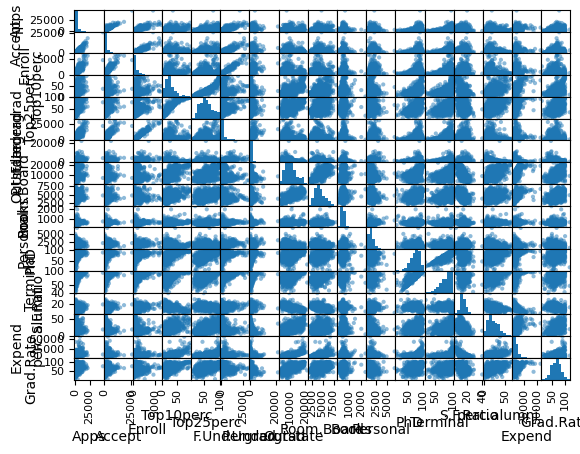

In [ ]:
pd.plotting.scatter_matrix(college)


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

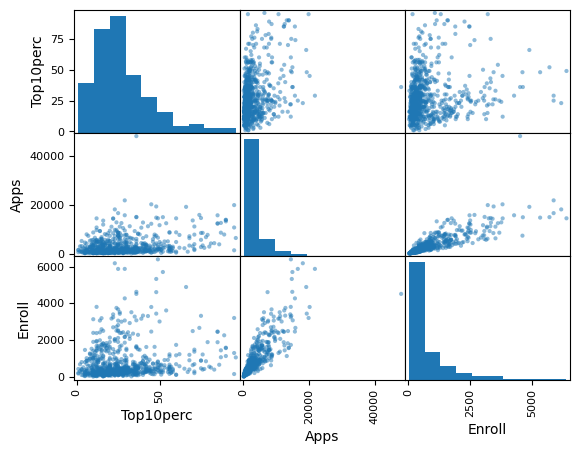

In [12]:
#(d)use scatter matrix to produce a scatter plot of columns Top10perc, Apps, and Enroll
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']])


In [14]:
# view the college dataframe but order it by the number of applications descending
print(college.sort_values(by='Top10perc', ascending=False))


                                      Private   Apps  Accept  Enroll  \
Massachusetts Institute of Technology     Yes   6411    2140    1078   
University of California at Berkeley       No  19873    8252    3215   
Harvey Mudd College                       Yes   1377     572     178   
Yale University                           Yes  10705    2453    1317   
Duke University                           Yes  13789    3893    1583   
...                                       ...    ...     ...     ...   
Virginia State University                  No   2996    2440     704   
Morris College                            Yes    882     730     330   
North Adams State College                  No   1563    1005     240   
Center for Creative Studies               Yes    601     396     203   
Fayetteville State University              No   1455    1064     452   

                                       Top10perc  Top25perc  F.Undergrad  \
Massachusetts Institute of Technology         96         99

Text(0, 0.5, 'Out of state tuition')

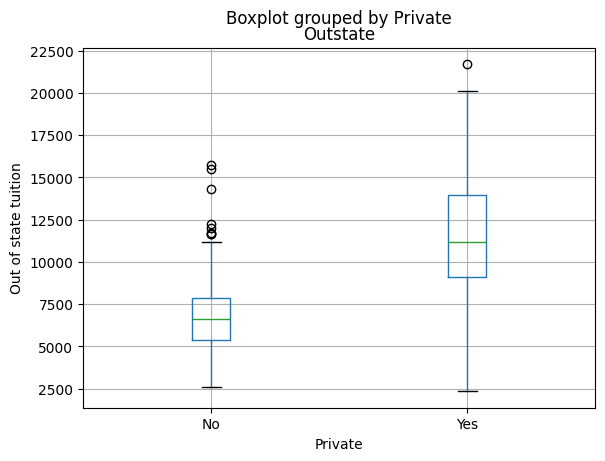

In [15]:
# (e) use boxplot to produce a boxplot of Outstate versus Private
college.boxplot(column='Outstate', by='Private').set_ylabel("Out of state tuition")


In [16]:
# create a new qualitative variable, called Elite, by binning the Top10perc variable into two groups based on
#  proportion of students coming from the top 10% of their high school classes is greater than 50% or not
college['Elite'] = pd.cut(college['Top10perc']/100, [0, 0.5, 1], labels = ['No', 'Yes'])
# look at some values to see if Elite worked/makes sense
print(college['Elite'])


In [18]:
#use the value_counts method on the Elite column to produce counts of the number of Elite and Non-Elite schools
print("Value Counts of Elite")
print(college['Elite'].value_counts())


Value Counts of Elite
Elite
No     699
Yes     78
Name: count, dtype: int64


Text(0, 0.5, 'Out of state tuition')

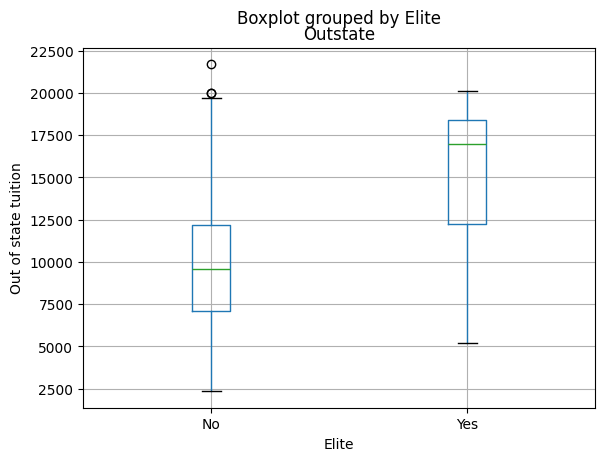

In [19]:
# use boxplot to produce a boxplot of Outstate versus Elite
college.boxplot(column='Outstate', by='Elite').set_ylabel("Out of state tuition")


Text(0.5, 1.0, 'Enroll')

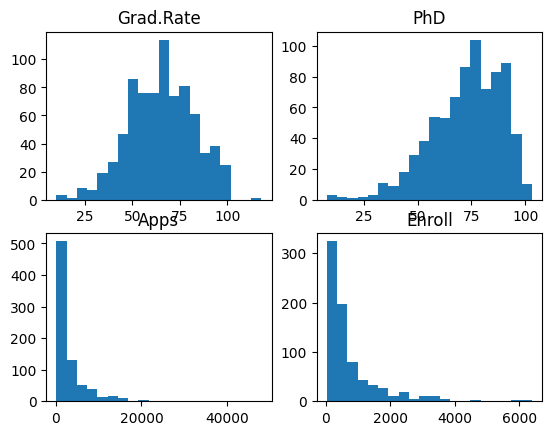

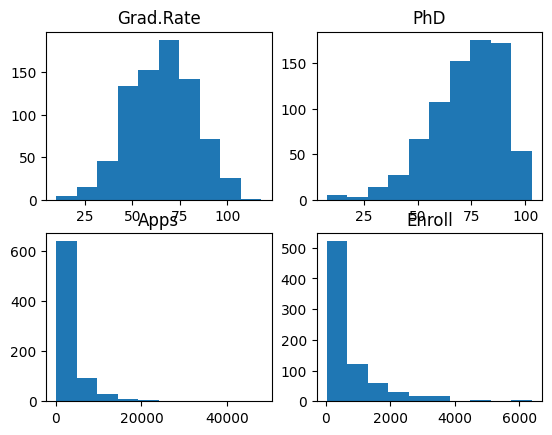

In [20]:
# use plot.hist() method of college to produce some histograms with differing numbers of bins for a few of the quantitative variables
# use plt.suplots() to create a 2x2 grid of plots
# use plt.show() to display the plots
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(college['Grad.Rate'], bins=20)
ax1.set_title('Grad.Rate')
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(college['PhD'], bins=20)
ax2.set_title('PhD')
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(college['Apps'], bins=20)
ax3.set_title('Apps')
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(college['Enroll'], bins=20)
ax4.set_title('Enroll')

# same thing but with fewer buckets
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(college['Grad.Rate'], bins=10)
ax1.set_title('Grad.Rate')
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(college['PhD'], bins=10)
ax2.set_title('PhD')
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(college['Apps'], bins=10)
ax3.set_title('Apps')
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(college['Enroll'], bins=10)
ax4.set_title('Enroll')